In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/KeithGalli/Regression-Example/master/insurance.csv"
df = pd.read_csv(url)



In [2]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,Northwest,$10600.5483
1334,-18.0,female,31.920,0.0,no,Northeast,2205.9808
1335,18.0,female,36.850,0.0,no,southeast,$1629.8335
1336,21.0,female,25.800,0.0,no,southwest,2007.945


In [3]:
#convert the 
#convert age from str to numeric 
# find the out of range values  in age and replace it with nan the range should be (0,100)
# sex is [Male,female] replace all things to the binary 
#children >= 0
# replace all values to [southwest,northwest ]
#convert the charges to float 

In [4]:
df["age"] = pd.to_numeric(df["age"],errors = "coerce")
df[(df.age < 1) | (df.age > 100)] = np.nan
df.sex.replace(["male","man","M"],"male",inplace = True)
df.sex.replace(["female","woman","F"],"female",inplace = True)
df[df.children < 0] = np.nan
df["region"] = df["region"].str.lower()
df["charges"] = df["charges"].str.replace(r"[^0-9.]","",regex = True)
df["charges"] = pd.to_numeric(df["charges"],errors= "coerce")

C:\Users\sriha\AppData\Local\Temp\ipykernel_29072\323174406.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df.sex.replace(["male","man","M"],"male",inplace = True)
C:\Users\sriha\AppData\Local\Temp\ipykernel_29072\323174406.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assi

In [5]:
df = df.dropna(how="all")
df = df.dropna(subset = ["charges"])
df["region"] = df.region.fillna(df.region.mode()[0])
df["sex"] = df.sex.fillna(df.sex.mode()[0])
df = df.dropna()
df = df.reset_index()
df.drop(["index"],inplace = True,axis = 1)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1110 non-null   float64
 1   sex       1110 non-null   str    
 2   bmi       1110 non-null   float64
 3   children  1110 non-null   float64
 4   smoker    1110 non-null   str    
 5   region    1110 non-null   str    
 6   charges   1110 non-null   float64
dtypes: float64(4), str(3)
memory usage: 60.8 KB


<Axes: xlabel='charges', ylabel='count'>

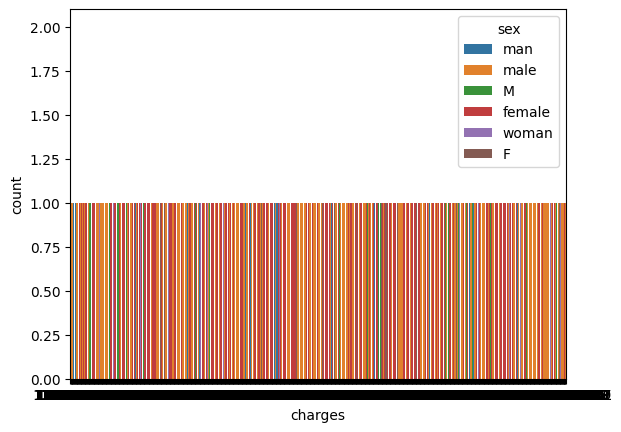

In [11]:
import seaborn as sns 
sns.countplot(data=df, x="charges", hue="sex")


In [7]:
from sklearn.model_selection import train_test_split 

X = df.drop(["charges"],axis = 1)
y = df.iloc[:,[-1]]


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=21,train_size = 0.8)


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1110 non-null   float64
 1   sex       1110 non-null   str    
 2   bmi       1110 non-null   float64
 3   children  1110 non-null   float64
 4   smoker    1110 non-null   str    
 5   region    1110 non-null   str    
 6   charges   1110 non-null   float64
dtypes: float64(4), str(3)
memory usage: 60.8 KB


In [9]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,Lasso
ridge = Ridge()
numerical_columns = ["age","bmi","children"]
categorical_columns = ["sex","smoker","region"]

preprocess = ColumnTransformer(
    transformers = [
        ("numerical", StandardScaler(),numerical_columns),
        ("categorical", OneHotEncoder(drop= "first", handle_unknown= "ignore"),categorical_columns),
    ]
)

pipeline = Pipeline(
    [
        ("preprocess",preprocess),
        ("model", ridge)
    ]
)

In [10]:
pipeline.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numerical', ...), ('categorical', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different tra

In [16]:
y_pred_test = pipeline.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2_score(y_test,y_pred_test)



0.7939521625153683

In [17]:
mean_squared_error(y_test,y_pred_test)

34723910.12338893

In [18]:
mean_absolute_error(y_test, y_pred_test)


4196.682154952629

In [19]:
import joblib

joblib.dump(pipeline, "charges_pipeline.pkl")


['charges_pipeline.pkl']

In [20]:
import joblib
import pandas as pd

loaded_pipe = joblib.load("charges_pipeline.pkl")

new_row = pd.DataFrame([{
    "age": 40,
    "bmi": 31.5,
    "children": 2,
    "sex": "male",
    "smoker": "no",
    "region": "southeast"
}])

prediction = loaded_pipe.predict(new_row)
print(prediction)


[8854.17603284]
